<a href="https://colab.research.google.com/github/vini1lol/Treinamento-rede-SOM/blob/master/SOM_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SOM (Self-Organizing Map)

O objetivo deste exemplo é treinar um modelo não-supervisionado.



In [2]:
import pandas as pd
import numpy as np

## Carregando os dados

In [7]:
dataSet =  pd.read_csv("https://raw.githubusercontent.com/Natalnet/GCiD/master/Codes/Data/notas_lop_2017_2.csv",index_col=False )
dataSet.head()

,Unnamed: 0,lab1,lab2,lab3,lab4,lab5,exe1,exe2,exe3,exe4,exe5
0,0,10.0,10.0,2.0,4.0,10.0,3.333333,2.777778,4.000000,1.250,3.12500
1,1,0.0,6.4,10.0,NaN,10.0,0.000000,1.777778,2.666667,0.625,5.62500
2,4382,NaN,2.0,4.0,2.0,2.0,NaN,0.555556,3.106667,3.125,2.08125
3,4381,NaN,2.0,4.0,2.0,2.0,NaN,0.555556,3.106667,0.000,2.08125
4,4436,NaN,NaN,4.0,6.0,10.0,NaN,NaN,2.666667,1.875,3.12500


## Tratamento dos dados

In [31]:
# Seleciona todos os espaços vazios(NaN) e troca por 0.0
dataSet.fillna(0.0,inplace=True)
dataSet.head()

,Unnamed: 0,lab1,lab2,lab3,lab4,lab5,exe1,exe2,exe3,exe4,exe5
0,0,10.0,10.0,2.0,4.0,10.0,3.333333,2.777778,4.000000,1.250,3.12500
1,1,0.0,6.4,10.0,0.0,10.0,0.000000,1.777778,2.666667,0.625,5.62500
2,4382,0.0,2.0,4.0,2.0,2.0,0.000000,0.555556,3.106667,3.125,2.08125
3,4381,0.0,2.0,4.0,2.0,2.0,0.000000,0.555556,3.106667,0.000,2.08125
4,4436,0.0,0.0,4.0,6.0,10.0,0.000000,0.000000,2.666667,1.875,3.12500


In [41]:
dataSet.drop(columns="Unnamed: 0",inplace=True)
dataSet.head()

,lab1,lab2,lab3,lab4,lab5,exe1,exe2,exe3,exe4,exe5
0,10.0,10.0,2.0,4.0,10.0,3.333333,2.777778,4.000000,1.250,3.12500
1,0.0,6.4,10.0,0.0,10.0,0.000000,1.777778,2.666667,0.625,5.62500
2,0.0,2.0,4.0,2.0,2.0,0.000000,0.555556,3.106667,3.125,2.08125
3,0.0,2.0,4.0,2.0,2.0,0.000000,0.555556,3.106667,0.000,2.08125
4,0.0,0.0,4.0,6.0,10.0,0.000000,0.000000,2.666667,1.875,3.12500


In [48]:

X_train = dataSet.values


[row, col] = X_train.shape
print (row," ",col)
print(X_train[0])

298   10
[10.         10.          2.          4.         10.          3.33333333
  2.77777778  4.          1.25        3.125     ]


## Treinamento 

In [49]:
# Instalando a MiniSOM
!pip install minisom


  Created wheel for minisom: filename=MiniSom-2.2.8-cp37-none-any.whl size=8604 sha256=7073b34c508d750e3205dcefba24b3e755c4f6f2a2aa7e7cf133c595334163bc
  Stored in directory: /root/.cache/pip/wheels/78/7e/a8/435947263149d3b94fa65339751f8c65617c436b0bdfb29c7d
Successfully built minisom


In [50]:
# Training the SOM
tamanhoXdaRede = 6; 
tamanhoYdaRede = 6; 

quantidadeCaracteristicas = col
from minisom import MiniSom
som = MiniSom(x = tamanhoXdaRede, y = tamanhoYdaRede, input_len = quantidadeCaracteristicas, sigma = 1.0, learning_rate = 0.4)
som.pca_weights_init(X_train)

In [51]:
som.train_random(data = X_train, num_iteration = 800000)

## Visualização do treinamento 

In [52]:
import matplotlib.pyplot as plt
import numpy as np
# Obtem o vetor de pesos da rede treinada 
pesos = som.get_weights()

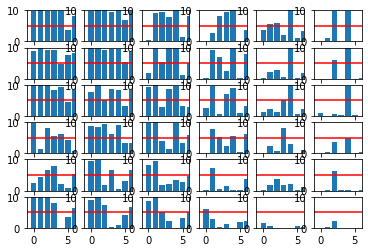

In [53]:
# Mostra todos os pesos 
cont = 1;
x = np.arange(quantidadeCaracteristicas)
for row in pesos:
  for elem in row:
    plt.subplot(tamanhoXdaRede,tamanhoYdaRede,cont)
    cont=cont+1
    plt.axis([-1, 6, 0, 10])
    plt.bar(x, elem)
    plt.plot([-1,6],[5,5],'r')
plt.show()
#plt.savefig("test_som.jpg", dpi=150)

In [72]:
def mostraNeuronio(linha,coluna): 
  # Mostra um peso 
  x = dataSet.columns
  plt.plot([-1,10],[5,5],'r')
  plt.axis([-1, 10, 0, 10])
  plt.bar(x, pesos[linha,coluna,:])
  plt.show()

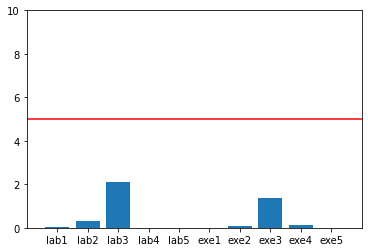

In [73]:
mostraNeuronio(5,5)

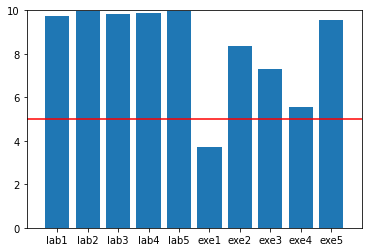

In [74]:
mostraNeuronio(0,0)